In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# we want our plots to appear inside the notebook
%matplotlib inline 



In [2]:
df = pd.read_excel("Test 1_Shear_Wall_Database Samples.xlsx")

In [3]:
df.head()

,Author,Specimen,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Section,Ab/Ag,FailureMode
0,Lefas et al. (1990a),SW11,1.1,10.714286,0.268879,0.136711,0.348231,0.149140,0.000000,R,0.0,1
1,Lefas et al. (1990a),SW12,1.1,10.714286,0.262358,0.133396,0.339785,0.145522,0.102168,R,0.0,1
2,Lefas et al. (1990a),SW13,1.1,10.714286,0.346364,0.176108,0.448584,0.192118,0.208187,R,0.0,1
3,Lefas et al. (1990a),SW14,1.1,10.714286,0.334023,0.169834,0.432601,0.185273,0.000000,R,0.0,1
4,Lefas et al. (1990a),SW15,1.1,10.714286,0.324766,0.165127,0.420612,0.180139,0.101727,R,0.0,1


In [4]:
df.tail()

,Author,Specimen,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Section,Ab/Ag,FailureMode
388,Lu et al. (2020),C4,2.0,9.333333,0.055444,0.021614,0.045821,0.021614,0.000000,R,0.0,1
389,Lu et al. (2021),C5,2.0,9.333333,0.054497,0.021186,0.044915,0.021186,0.074657,R,0.0,1
390,Lu et al. (2022),C6,2.0,9.333333,0.051863,0.020107,0.042627,0.020107,0.037023,R,0.0,1
391,Tripathi et al. (2019),SWD-1,1.0,13.333333,0.056010,0.025145,0.195075,0.073279,0.055000,R,0.0,1
392,Tripathi et al. (2020),SWD-2,1.0,13.333333,0.053381,0.023964,0.185919,0.052722,0.055000,R,0.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Author       393 non-null    object 
 1   Specimen     393 non-null    object 
 2   M/Vlw        393 non-null    float64
 3   lw/tw        393 non-null    float64
 4   ρvwFy,vw/fc  393 non-null    float64
 5   ρhwFy,vw/fc  393 non-null    float64
 6   ρvcFy,vc/fc  393 non-null    float64
 7   ρhcFy,hc/fc  393 non-null    float64
 8   P/fcAg       393 non-null    float64
 9   Section      393 non-null    object 
 10  Ab/Ag        393 non-null    float64
 11  FailureMode  393 non-null    int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 37.0+ KB


In [6]:
df["FailureMode"].value_counts()

1    152
3    122
2     96
4     23
Name: FailureMode, dtype: int64

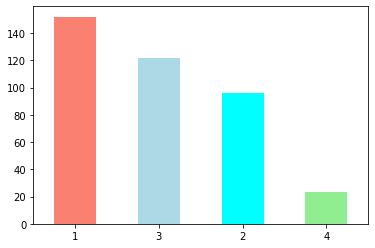

In [7]:
df["FailureMode"].value_counts().plot(kind = "bar" , color=["salmon","lightblue","cyan","lightgreen"])
plt.xticks(rotation=0);

In [8]:
# Are there any missing value
df.isna().sum()

Author         0
Specimen       0
M/Vlw          0
lw/tw          0
ρvwFy,vw/fc    0
ρhwFy,vw/fc    0
ρvcFy,vc/fc    0
ρhcFy,hc/fc    0
P/fcAg         0
Section        0
Ab/Ag          0
FailureMode    0
dtype: int64

In [9]:
df.describe()

,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Ab/Ag,FailureMode
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,1.388857,14.689568,0.082951,0.079658,0.383600,0.127831,0.067140,0.097730,2.040712
std,0.711448,8.693220,0.073123,0.060038,0.373769,0.209519,0.104530,0.127030,0.965408
min,0.249869,4.347826,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.842105,9.333333,0.036534,0.034741,0.156613,0.010128,0.000000,0.000000,1.000000
50%,1.166667,12.500000,0.061306,0.064149,0.300164,0.053149,0.000000,0.000000,2.000000
75%,2.000000,18.750000,0.102583,0.106095,0.461470,0.149140,0.097852,0.222222,3.000000
max,4.100000,57.000000,0.487957,0.326964,2.645968,1.264049,0.499402,0.443262,4.000000


## FAILUREMODE FREQUENCY ACCORDING TO SECTION

In [10]:
df["Section"].value_counts()

R    238
B     95
F     60
Name: Section, dtype: int64

In [11]:
# Compare Failure column with specimen column
pd.crosstab(df.FailureMode, df.Section)

Section,B,F,R
FailureMode,,,
1,15,6,131
2,31,3,62
3,48,46,28
4,1,5,17


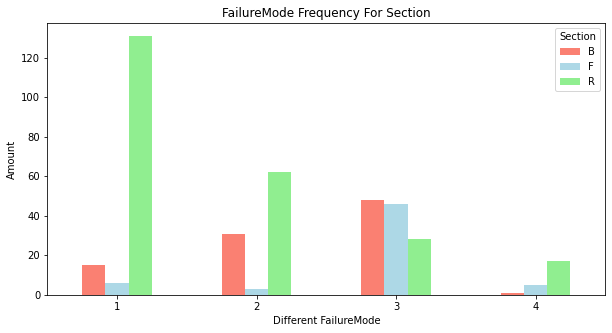

In [12]:
pd.crosstab(df.FailureMode, df.Section).plot(kind = "bar",
                                             figsize = (10,5) , 
                                             color = ["salmon","lightblue","lightgreen"]);
plt.title("FailureMode Frequency For Section")
plt.xlabel("Different FailureMode")
plt.ylabel("Amount")
plt.xticks(rotation=0);


In [13]:
pd.crosstab(df.Section , df.FailureMode)

FailureMode,1,2,3,4
Section,,,,
B,15,31,48,1
F,6,3,46,5
R,131,62,28,17


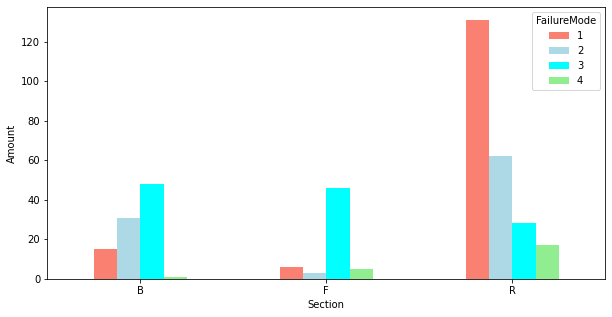

In [14]:
pd.crosstab(df.Section , df.FailureMode).plot(kind = "bar",
                                             figsize = (10,5) , 
                                             color = ["salmon","lightblue","cyan","lightgreen"]);
plt.xticks(rotation=0)
plt.ylabel("Amount");

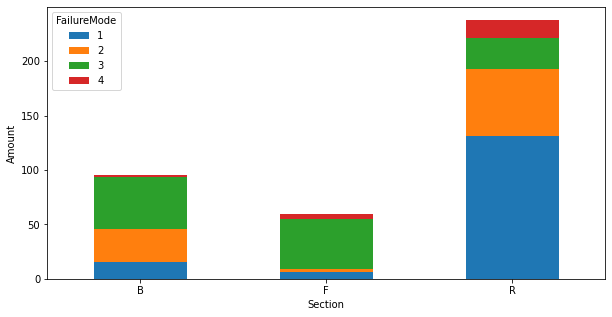

In [15]:
pd.crosstab(df.Section , df.FailureMode).plot(kind = "bar",
                                             figsize = (10,5), 
                                             stacked = True);
plt.xticks(rotation=0)
plt.ylabel("Amount");


##  FailureMode *`comparing with other columns in the dataframe`*

In [16]:
df["M/Vlw"].value_counts()

0.842105    33
2.000000    31
1.000000    31
2.200000    23
1.100000    22
            ..
2.083333     1
1.900000     1
3.750000     1
1.700000     1
0.566667     1
Name: M/Vlw, Length: 74, dtype: int64

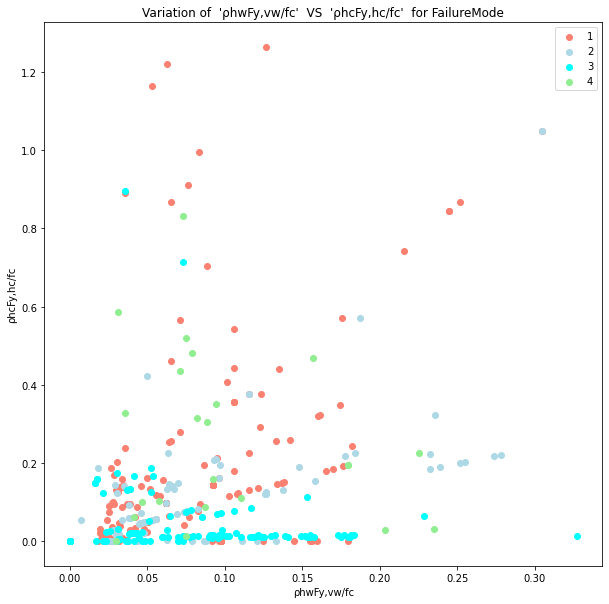

In [17]:
# Create another figure
plt.figure(figsize=(10 , 10))

# Scatter with postivie examples
plt.scatter(df["ρhwFy,vw/fc"][df.FailureMode==1],
            df["ρhcFy,hc/fc"][df.FailureMode==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df["ρhwFy,vw/fc"][df.FailureMode==2],
            df["ρhcFy,hc/fc"][df.FailureMode==2],
            c="lightblue")
#
plt.scatter(df["ρhwFy,vw/fc"][df.FailureMode==3],
            df["ρhcFy,hc/fc"][df.FailureMode==3],
            c="cyan")
#
plt.scatter(df["ρhwFy,vw/fc"][df.FailureMode==4],
            df["ρhcFy,hc/fc"][df.FailureMode==4],
            c="lightgreen")

# Add some helpful info
plt.title("Variation of  'ρhwFy,vw/fc'  VS  'ρhcFy,hc/fc'  for FailureMode")
plt.xlabel("ρhwFy,vw/fc")
plt.ylabel("ρhcFy,hc/fc")
plt.legend(["1", "2" , "3" , "4"]);

DROPPING UNIMPORTANT COLUMNS



In [18]:
df.head()

,Author,Specimen,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Section,Ab/Ag,FailureMode
0,Lefas et al. (1990a),SW11,1.1,10.714286,0.268879,0.136711,0.348231,0.149140,0.000000,R,0.0,1
1,Lefas et al. (1990a),SW12,1.1,10.714286,0.262358,0.133396,0.339785,0.145522,0.102168,R,0.0,1
2,Lefas et al. (1990a),SW13,1.1,10.714286,0.346364,0.176108,0.448584,0.192118,0.208187,R,0.0,1
3,Lefas et al. (1990a),SW14,1.1,10.714286,0.334023,0.169834,0.432601,0.185273,0.000000,R,0.0,1
4,Lefas et al. (1990a),SW15,1.1,10.714286,0.324766,0.165127,0.420612,0.180139,0.101727,R,0.0,1


In [19]:
# Lets drop columns like "Author" , "Specimen" which contributes least to features importances
df_1 = df.drop(["Author" , "Specimen"] , axis= 1)

In [20]:
df_1.head()

,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Section,Ab/Ag,FailureMode
0,1.1,10.714286,0.268879,0.136711,0.348231,0.149140,0.000000,R,0.0,1
1,1.1,10.714286,0.262358,0.133396,0.339785,0.145522,0.102168,R,0.0,1
2,1.1,10.714286,0.346364,0.176108,0.448584,0.192118,0.208187,R,0.0,1
3,1.1,10.714286,0.334023,0.169834,0.432601,0.185273,0.000000,R,0.0,1
4,1.1,10.714286,0.324766,0.165127,0.420612,0.180139,0.101727,R,0.0,1


In [21]:
df_1.shape

(393, 10)

## Converting String To Categories

*One way we can turn all of our data into numbers is by converting them into pandas catgories.* 

*and also it will be easier to plot the graph and display the relationship between section and other columns in out DataFrame*

In [22]:
pd.api.types.is_string_dtype(df_1["Section"])

True

In [23]:
df_2 = df_1.copy()

In [24]:
# since we know that section column has string value in it we need to convert that into numerical values
df_2["Section"] = df_2["Section"].astype("category").cat.codes+1
# added 1 beacuse the index started filling with "0 , 1 , 2" which now is --> 1,2,3("B,F,R")
df_2.tail(20)

,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Section,Ab/Ag,FailureMode
373,2.333333,7.500000,0.023469,0.064286,0.051020,0.064286,0.070000,3,0.000000,1
374,1.083333,12.000000,0.038007,0.030541,0.038007,0.202249,0.000000,3,0.000000,1
375,1.199803,10.059406,0.065500,0.065500,0.037921,0.461267,0.000000,3,0.000000,1
376,1.199803,10.059406,0.073373,0.073373,0.063364,0.830974,0.000000,3,0.000000,4
377,1.500000,10.059406,0.065546,0.065546,0.066297,0.867796,0.000000,3,0.000000,1
378,1.500000,10.059406,0.062894,0.062894,0.100970,1.220338,0.000000,3,0.000000,1
379,1.500000,10.059406,0.052902,0.052902,0.097546,1.163846,0.000000,3,0.000000,1
380,1.650000,10.000000,0.383710,0.031452,2.645968,0.031452,0.000000,3,0.000000,3
381,2.023529,8.500000,0.042538,0.046184,0.248836,0.139768,0.078642,3,0.000000,1
382,0.675000,16.666667,0.075560,0.075560,0.460000,0.077876,0.000000,1,0.227273,2


In [25]:
# codes placed in alphabetical order
df_2["Section"].value_counts()

3    238
1     95
2     60
Name: Section, dtype: int64

In [26]:
# No null value check onces again
df_2.isnull().sum()

M/Vlw          0
lw/tw          0
ρvwFy,vw/fc    0
ρhwFy,vw/fc    0
ρvcFy,vc/fc    0
ρhcFy,hc/fc    0
P/fcAg         0
Section        0
Ab/Ag          0
FailureMode    0
dtype: int64

In [27]:
# Make a correlation matrix
df_2.corr()

,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Section,Ab/Ag,FailureMode
M/Vlw,1.000000,-0.432906,0.071142,-0.068613,-0.159257,0.121842,0.513023,0.274424,-0.228734,-0.574631
lw/tw,-0.432906,1.000000,0.100358,0.290474,-0.048264,-0.217311,-0.317442,-0.624456,0.571440,0.365094
"ρvwFy,vw/fc",0.071142,0.100358,1.000000,0.460766,0.132974,0.076706,0.143473,-0.015112,0.010784,-0.009556
"ρhwFy,vw/fc",-0.068613,0.290474,0.460766,1.000000,0.168458,0.314323,0.112008,-0.234612,0.188047,0.056095
"ρvcFy,vc/fc",-0.159257,-0.048264,0.132974,0.168458,1.000000,0.181473,-0.122501,0.086562,-0.127323,0.153474
"ρhcFy,hc/fc",0.121842,-0.217311,0.076706,0.314323,0.181473,1.000000,0.122714,0.188773,-0.181119,-0.178897
P/fcAg,0.513023,-0.317442,0.143473,0.112008,-0.122501,0.122714,1.000000,0.233016,-0.192794,-0.380332
Section,0.274424,-0.624456,-0.015112,-0.234612,0.086562,0.188773,0.233016,1.000000,-0.870558,-0.342774
Ab/Ag,-0.228734,0.571440,0.010784,0.188047,-0.127323,-0.181119,-0.192794,-0.870558,1.000000,0.357542
FailureMode,-0.574631,0.365094,-0.009556,0.056095,0.153474,-0.178897,-0.380332,-0.342774,0.357542,1.000000


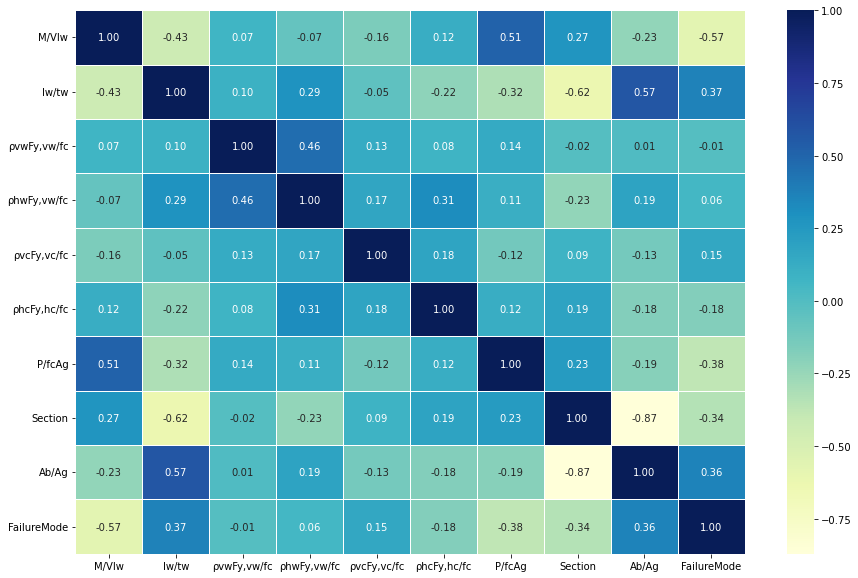

In [28]:
# Let's make our correlation matrix a little prettier and more easy to visualize
corr_matrix = df_2.corr()
fig , ax = plt.subplots(figsize = (15,10) )
ax = sns.heatmap(corr_matrix ,
                annot= True,
                linewidths=0.5,
                fmt= ".2f",
                cmap = "YlGnBu");
bottom, top = ax.get_ylim()



In [29]:
df_2.columns

Index(['M/Vlw', 'lw/tw', 'ρvwFy,vw/fc', 'ρhwFy,vw/fc', 'ρvcFy,vc/fc',
       'ρhcFy,hc/fc', 'P/fcAg', 'Section', 'Ab/Ag', 'FailureMode'],
      dtype='object')

Since there are many random variables. Hence we can use `Seaborn Pairplot`


*The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.*

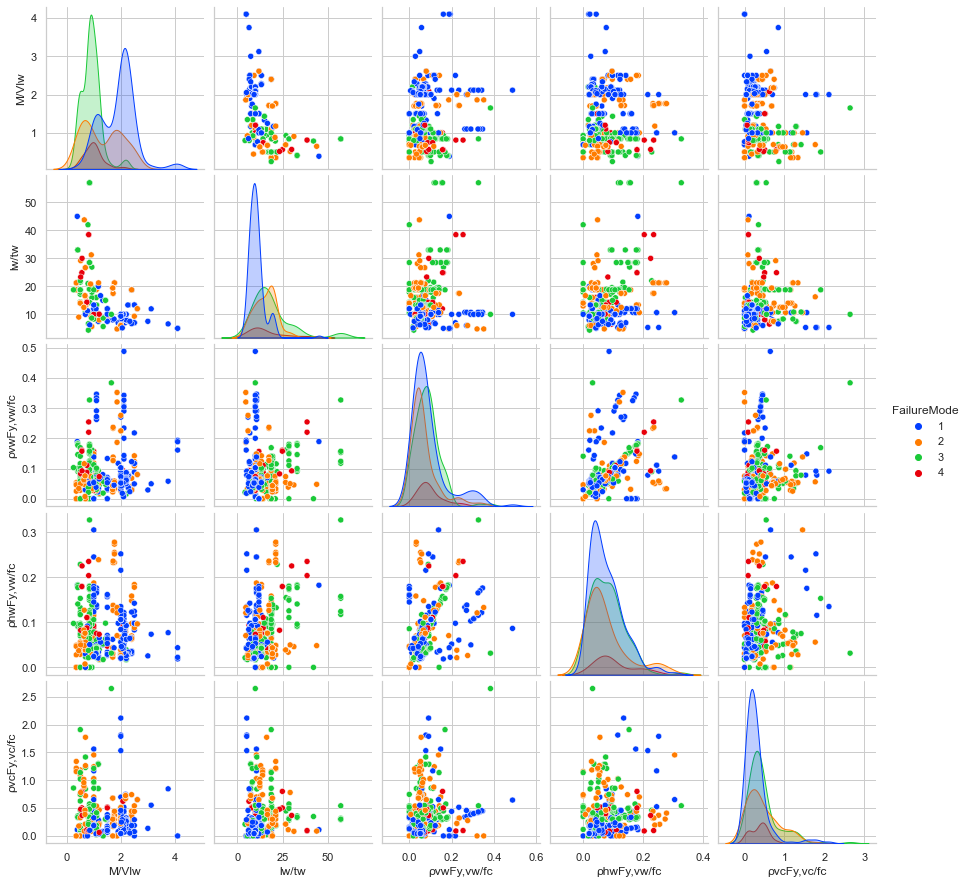

In [30]:
sns.set(style = "whitegrid" )
# since we need relationships between the FailureMode column and others, we will divide it into group of two because 2x2 space given
data_1 = ["FailureMode" , 'M/Vlw' , 'lw/tw' , 'ρvwFy,vw/fc' , 'ρhwFy,vw/fc' , 'ρvcFy,vc/fc']
relationship_data_1 = df_2[data_1]
sns.pairplot(relationship_data_1 , hue= "FailureMode" , palette="bright");
# hue = Variable in “data“ to map plot aspects to different colors.
# palette = Set of colors for mapping the “hue“ variable. In case of a dict, the keys should be values in the “hue“ variable. vars: list of variable names, optional

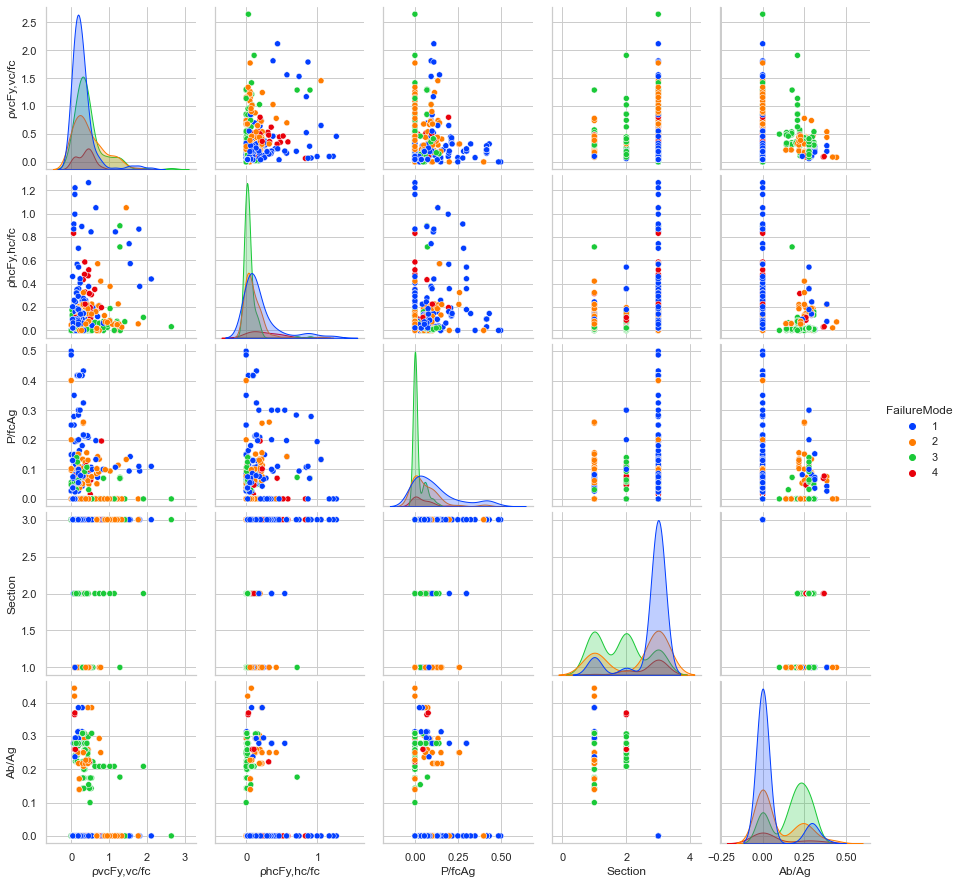

In [31]:
sns.set(style = "whitegrid" )
# since we need relationships between the FailureMode column and others, we will divide it into group of two because 2x2 space given
data_2 = ["FailureMode" , 'ρvcFy,vc/fc' , 'ρhcFy,hc/fc' , 'P/fcAg' , 'Section' , 'Ab/Ag']
relationship_data_2 = df_2[data_2]
sns.pairplot(relationship_data_2 , hue= "FailureMode" , palette="bright");
# hue = Variable in “data“ to map plot aspects to different colors.
# palette = Set of colors for mapping the “hue“ variable. In case of a dict, the keys should be values in the “hue“ variable. vars: list of variable names, optional

In [32]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   M/Vlw        393 non-null    float64
 1   lw/tw        393 non-null    float64
 2   ρvwFy,vw/fc  393 non-null    float64
 3   ρhwFy,vw/fc  393 non-null    float64
 4   ρvcFy,vc/fc  393 non-null    float64
 5   ρhcFy,hc/fc  393 non-null    float64
 6   P/fcAg       393 non-null    float64
 7   Section      393 non-null    int8   
 8   Ab/Ag        393 non-null    float64
 9   FailureMode  393 non-null    int64  
dtypes: float64(8), int64(1), int8(1)
memory usage: 28.1 KB


## MODELLING 

In [33]:
df_2.head()

,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Section,Ab/Ag,FailureMode
0,1.1,10.714286,0.268879,0.136711,0.348231,0.149140,0.000000,3,0.0,1
1,1.1,10.714286,0.262358,0.133396,0.339785,0.145522,0.102168,3,0.0,1
2,1.1,10.714286,0.346364,0.176108,0.448584,0.192118,0.208187,3,0.0,1
3,1.1,10.714286,0.334023,0.169834,0.432601,0.185273,0.000000,3,0.0,1
4,1.1,10.714286,0.324766,0.165127,0.420612,0.180139,0.101727,3,0.0,1


## PANDAS GET DUMMIES CREATES DUMMY VARIABLES FROM CATEGORICAL DATA

`important to convert in dummy to get more accurate results` 

In [34]:
df_2 = pd.get_dummies(df_2 , columns=["Section"] )

In [35]:
df_2

,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Ab/Ag,FailureMode,Section_1,Section_2,Section_3
0,1.1,10.714286,0.268879,0.136711,0.348231,0.149140,0.000000,0.0,1,0,0,1
1,1.1,10.714286,0.262358,0.133396,0.339785,0.145522,0.102168,0.0,1,0,0,1
2,1.1,10.714286,0.346364,0.176108,0.448584,0.192118,0.208187,0.0,1,0,0,1
3,1.1,10.714286,0.334023,0.169834,0.432601,0.185273,0.000000,0.0,1,0,0,1
4,1.1,10.714286,0.324766,0.165127,0.420612,0.180139,0.101727,0.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
388,2.0,9.333333,0.055444,0.021614,0.045821,0.021614,0.000000,0.0,1,0,0,1
389,2.0,9.333333,0.054497,0.021186,0.044915,0.021186,0.074657,0.0,1,0,0,1
390,2.0,9.333333,0.051863,0.020107,0.042627,0.020107,0.037023,0.0,1,0,0,1
391,1.0,13.333333,0.056010,0.025145,0.195075,0.073279,0.055000,0.0,1,0,0,1


In [36]:
# Split data into X and y
X = df_2.drop("FailureMode" , axis =1)
y = df_2["FailureMode"]

In [37]:
X.head()

,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Ab/Ag,Section_1,Section_2,Section_3
0,1.1,10.714286,0.268879,0.136711,0.348231,0.149140,0.000000,0.0,0,0,1
1,1.1,10.714286,0.262358,0.133396,0.339785,0.145522,0.102168,0.0,0,0,1
2,1.1,10.714286,0.346364,0.176108,0.448584,0.192118,0.208187,0.0,0,0,1
3,1.1,10.714286,0.334023,0.169834,0.432601,0.185273,0.000000,0.0,0,0,1
4,1.1,10.714286,0.324766,0.165127,0.420612,0.180139,0.101727,0.0,0,0,1


In [38]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: FailureMode, dtype: int64

In [39]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(42)
# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3)

In [40]:
len(X_train) , len(X_test)

(275, 118)

In [41]:
y_train.value_counts()

1    105
3     83
2     69
4     18
Name: FailureMode, dtype: int64

*Now we've got our data split into training and test sets, it's time to build a machine learning model.*

*We'll train it (find the patterns) on the training set.*

*And we'll test it (use the patterns) on the test set.*

We're going to try 6 different machine learning models:

1.`Logistic Regression`

2.`K-Nearest Neighbours Classifier`

3.`Random Forest Classifier`

4.`Decision Tree Classifier`

5.`Ada Boost Classifier`


In [74]:
#Import model from sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import AdaBoostClassifier



#Lets put our model in a dictionary 
models = { "LogisticRegression" : LogisticRegression(max_iter=4000),
           
           "KNN"                : KNeighborsClassifier(),
           
           "Random Forest"      : RandomForestClassifier(),
          
           "Decision Tree"      : DecisionTreeClassifier(),
          
           "AdaBoost"           : AdaBoostClassifier() 
           
           }


#create a function to fit and score the models on train datasets
def fit_and_score_on_train_data (model , X_train, y_train):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    
    """
    
    # Set random seed
    np.random.seed(42)
    # make a dictionary to store the model scores
    model_scores = {}
    #create a loop for models
    for name , model in models.items():
        # fit the model 
        model.fit(X_train , y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_train , y_train)
    return model_scores
        

#create a function to fit and score the models 
def fit_and_score_on_test_data (model , X_train, y_train , X_test , y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    
    """
    
    # Set random seed
    np.random.seed(42)
    # make a dictionary to store the model scores
    model_scores = {}
    #create a loop for models
    for name , model in models.items():
        # fit the model 
        model.fit(X_train , y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test , y_test)
    return model_scores
        
    

In [75]:
model_scores_on_train_data =  fit_and_score_on_train_data (model = models, 
                                                           X_train = X_train, 
                                                           y_train = y_train)
model_scores_on_train_data


{'LogisticRegression': 0.6763636363636364,
 'KNN': 0.8181818181818182,
 'Random Forest': 1.0,
 'Decision Tree': 1.0,
 'AdaBoost': 0.7381818181818182}

In [76]:
model_scores_on_test_data  = fit_and_score_on_test_data (model = models , X_train = X_train ,
                                y_train = y_train , 
                                X_test  = X_test  , 
                                y_test  = y_test  )
model_scores_on_test_data

{'LogisticRegression': 0.6610169491525424,
 'KNN': 0.6949152542372882,
 'Random Forest': 0.8305084745762712,
 'Decision Tree': 0.7796610169491526,
 'AdaBoost': 0.7033898305084746}

## Model comparsion 

In [46]:
model_compare = pd.DataFrame(model_scores_on_test_data , index = ["Accuracy"])
model_compare

,LogisticRegression,KNN,Random Forest,Decision Tree,AdaBoost
Accuracy,0.661017,0.694915,0.830508,0.779661,0.70339


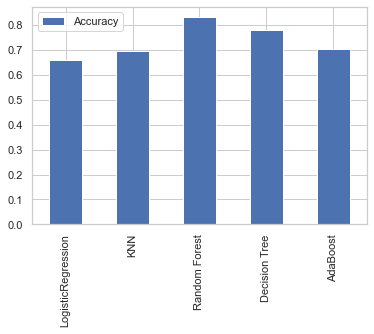

In [47]:
model_compare.T.plot(kind = "bar");

# `RandomForest classifier`

*scored highest on test dataset which was 30% of the total dataset*

***Accuracy = 83%*** 

## Hyperparameters tuning with RandomizedSearchCV

We're going to tune:

* RandomForestClassifier()


... using RandomizedSearchCV

In [48]:
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV

In [49]:
# create a hyperparameter grid for RandomForest classifier
rf_grid = {"n_estimators"     : np.arange(10 , 1000 , 50), 
           "max_depth"        : [3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,20,2)
                 }

In [50]:
#Tuning RandomForest classifier 

np.random.seed(42)

# Setup random hyperparameter search for RandomForest

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions = rf_grid ,
                                cv = 5 ,
                                n_iter = 50,
                                verbose=True)
# Fit random hyperparameter search model for Logistic Regression
rs_rf.fit(X_train , y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [3, 5, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100,
                                                      None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [51]:
rs_rf.best_params_

{'n_estimators': 160,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': 70}

In [52]:
rs_rf.score(X_test , y_test)

0.8135593220338984

## Hyperparameter Tuning with GridSearchCV

***Since our RandomForest model provides the best scores so far, we'll try and improve it again using GridSearchCV...***

In [53]:
# create a hyperparameter grid for RandomForest classifier
rf_grid = {"n_estimators"     : np.arange(10 , 200 , 20), 
           "max_depth"        : [3, 5, 20, 40, 90, None],
           "min_samples_split": [4 , 12 , 20],
           "min_samples_leaf" : [1 , 5  , 3 ]
                 }

# setup grid hyperparameter search for LogisticRegression
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid = rf_grid ,
                     cv = 5,
                     verbose = True)
# Fit grid hyperparameter search model 
gs_rf.fit(X_train , y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 20, 40, 90, None],
                         'min_samples_leaf': [1, 5, 3],
                         'min_samples_split': [4, 12, 20],
                         'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190])},
             verbose=True)

In [54]:
gs_rf.best_params_

{'max_depth': 90,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 150}

In [55]:
gs_rf.score(X_test , y_test)

0.8389830508474576

`EVALUTING OUR TUNED ML CLASSIFIER BEYOND ACCURACY`

* Confusion matrix


* Classification report



*... and it would be great if cross-validation was used where possible.*


*To make comparisons and evaluate our trained model, first we need to make predictions.*

In [56]:
#Model Evaluations 
from sklearn.metrics import confusion_matrix , classification_report 
from sklearn.metrics import precision_score , recall_score , f1_score

In [57]:
# Make predicitons with tuned model 
y_preds = gs_rf.predict(X_test)
y_preds

array([3, 2, 1, 2, 1, 2, 3, 4, 3, 1, 1, 2, 1, 3, 1, 3, 2, 1, 4, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1, 3, 2, 3, 1, 3, 3, 1, 3,
       3, 1, 1, 1, 3, 1, 3, 2, 3, 1, 2, 3, 3, 3, 1, 3, 1, 1, 3, 1, 3, 1,
       1, 3, 1, 1, 1, 1, 1, 3, 2, 2, 3, 1, 1, 1, 2, 3, 1, 1, 3, 2, 1, 2,
       2, 3, 2, 3, 1, 1, 1, 2, 3, 3, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 3, 4, 3, 2, 3, 1, 3], dtype=int64)

In [58]:
y_test

78     3
275    2
247    1
55     2
388    1
      ..
79     2
280    2
353    3
249    1
153    3
Name: FailureMode, Length: 118, dtype: int64

In [59]:
# Confusion matrix
print(confusion_matrix(y_test , y_preds))

[[43  3  1  0]
 [ 4 17  5  1]
 [ 2  0 37  0]
 [ 2  0  1  2]]


In [60]:
sns.set (font_scale = 1.5)

def plot_conf_mat(y_test , y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    
    """
    fig , ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test , y_preds) , 
                     annot = True,
                     cbar  = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

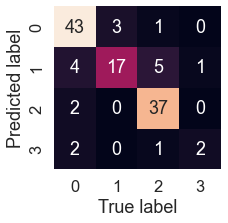

In [61]:
plot_conf_mat(y_test , y_preds)

`let's get a classification report as well as cross-validated precision, recall and f1-score.`

In [62]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.84      0.91      0.88        47
           2       0.85      0.63      0.72        27
           3       0.84      0.95      0.89        39
           4       0.67      0.40      0.50         5

    accuracy                           0.84       118
   macro avg       0.80      0.72      0.75       118
weighted avg       0.84      0.84      0.83       118



## Calculate evaluation metrics using cross-validation

`we are going to calculate accuracy , precision , recall and f1_score of our model using cross-validation and the function we are gonna use is`

***`cross_val_score()`***

In [63]:
#Import 
from sklearn.model_selection import cross_val_score

In [64]:
# Check best hyperparameters
gs_rf.best_params_

{'max_depth': 90,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 150}

In [65]:
# Create a new classifier with best parameters
clf = RandomForestClassifier( n_estimators      = 170,
                          min_samples_split     = 4,
                          min_samples_leaf      = 1,
                          max_depth             = 90)

In [66]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf ,
                         X ,
                         y ,
                         cv = 20 ,
                         scoring= "accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.749736842105263

## Feature Importance

*Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"*

*Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".*


`Let's find the feature importance for our RandomForest classifier model...`

In [67]:
# Create a new classifier with best parameters
clf = RandomForestClassifier( n_estimators      = 170,
                          min_samples_split     = 4,
                          min_samples_leaf      = 1,
                          max_depth             = 90)
clf.fit(X_train , y_train);

In [68]:
# find feature importance of our best model
clf.feature_importances_

array([0.19222987, 0.16056426, 0.07086672, 0.07520652, 0.12365053,
       0.12796212, 0.07550658, 0.09671963, 0.01303817, 0.02556533,
       0.03869026])

In [69]:
# Helper function for plotting feature importance
def plot_features(columns, importances):
    data_frame = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots(figsize= (12,12))
    ax.barh(data_frame["features"], data_frame["feature_importances"])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

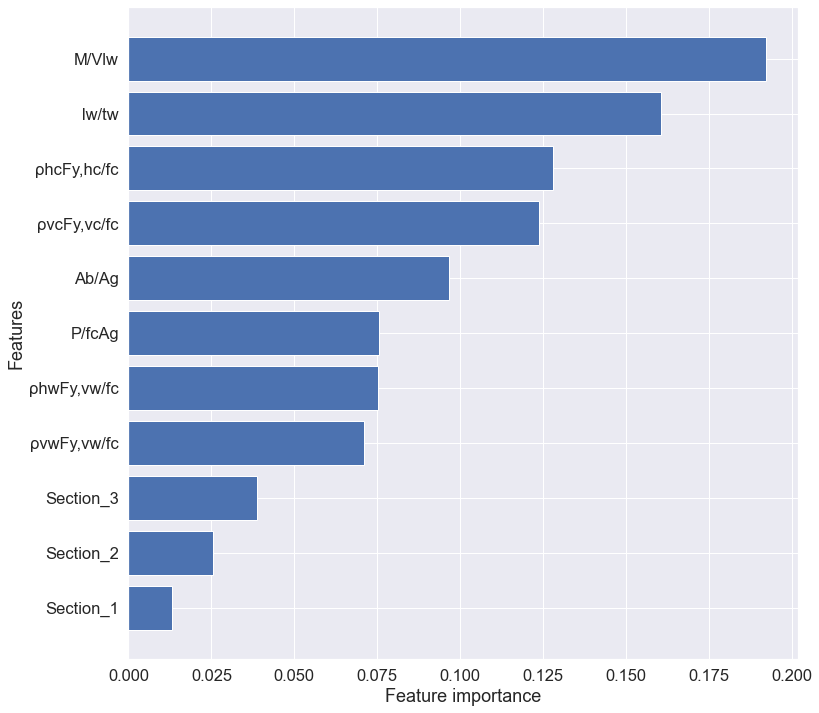

In [70]:
plot_features(X_train.columns , 
              clf.feature_importances_)

`*Hence we come up will a trained model which give us an accuracy of more that 80% which can be further use by our client to   satisfy their necessary requirements*`

***The model is a RandomForest classifier model with some hypertuned parameters shown below***

In [71]:
gs_rf.score(X_test , y_test)

0.8389830508474576

In [72]:
gs_rf.best_params_

{'max_depth': 90,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 150}

##  PREDICT THE TEST SAMPLES

In [77]:
gs_rf.predict(X_test)

array([3, 2, 1, 2, 1, 2, 3, 4, 3, 1, 1, 2, 1, 3, 1, 3, 2, 1, 4, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1, 3, 2, 3, 1, 3, 3, 1, 3,
       3, 1, 1, 1, 3, 1, 3, 2, 3, 1, 2, 3, 3, 3, 1, 3, 1, 1, 3, 1, 3, 1,
       1, 3, 1, 1, 1, 1, 1, 3, 2, 2, 3, 1, 1, 1, 2, 3, 1, 1, 3, 2, 1, 2,
       2, 3, 2, 3, 1, 1, 1, 2, 3, 3, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 3, 4, 3, 2, 3, 1, 3], dtype=int64)

In [81]:
predicted_labels = pd.DataFrame(gs_rf.predict(X_test))

In [82]:
predicted_labels.to_csv("predicted_labels.csv")